In [1]:
import warnings
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import matplotlib

%matplotlib inline

warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'seaborn'

In [2]:
# the regression models 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.cluster import KMeans

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import silhouette_score

# feature-selection methods
from sklearn.feature_selection import SelectFromModel

ModuleNotFoundError: No module named 'xgboost'

# **Data Ingestion**

In [4]:
df = pd.read_csv('../input/notebooks/data/insurance.csv')

# **Profile of data**

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [6]:
print("This dataset contains {} rows and {} columns.".format(df.shape[0], df.shape[1]))

This dataset contains 1338 rows and 7 columns.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


In [9]:
df.describe(include='object').T

,count,unique,top,freq
sex,1338,2,male,676
smoker,1338,2,no,1064
region,1338,4,southeast,364


In [10]:
# duplicate values check!

df.duplicated().sum()

1

In [11]:
# Dropping duplicate values
df.drop_duplicates(inplace=True)

In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

**Observations:**

* This dataset contains 1338 rows and 7 columns.
* There are no null values in this dataset.
* There are 4 numeric as well as 3 categorical features present in this dataset.
* There was 1 duplicate row present in this dataset.

# **Exploratory Data Analysis**

<Figure size 3500x3500 with 0 Axes>

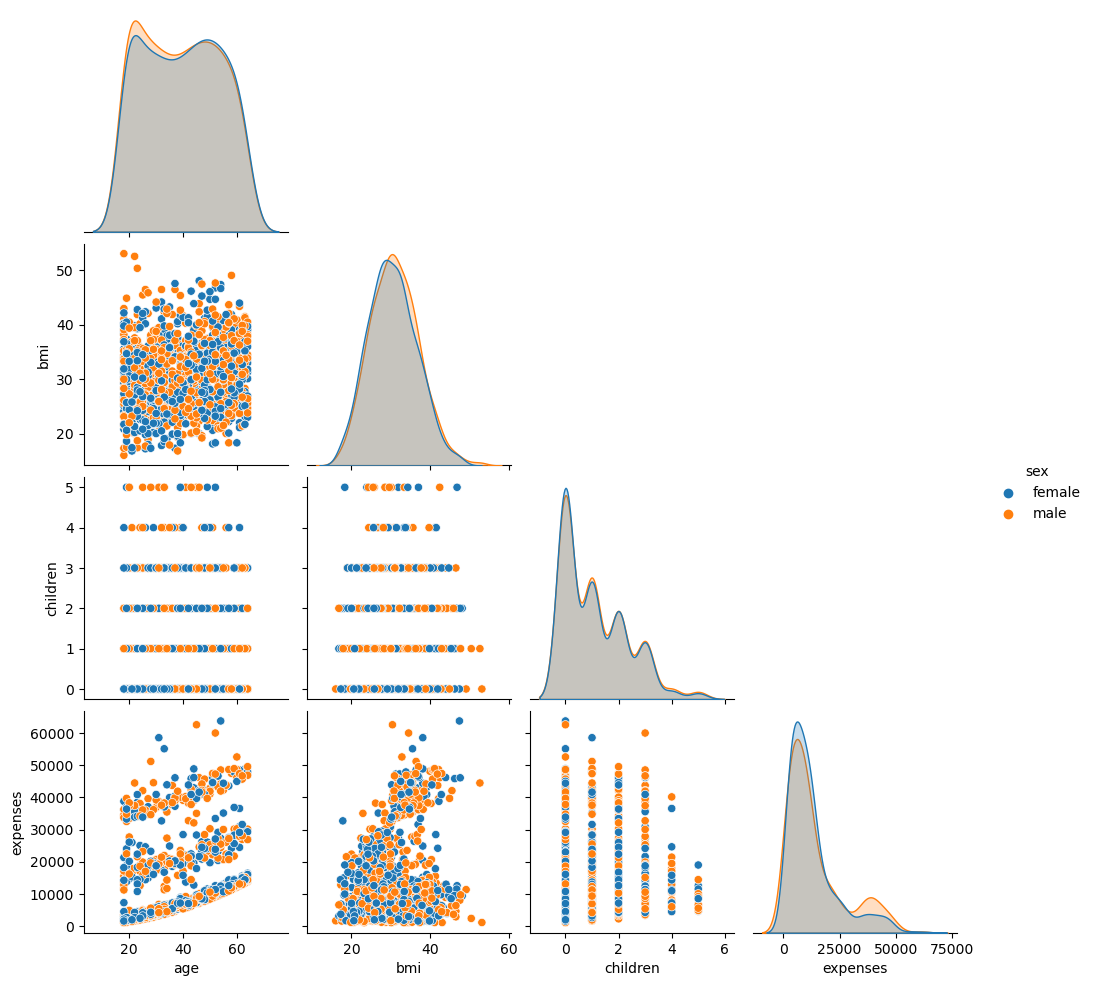

In [13]:
plt.figure(figsize=(35,35))
sns.pairplot(data=df, hue='sex', corner = True)

In [14]:
# Retrieving numerical columns from dataset
numeric_columns = [feature for feature in df.columns if df[feature].dtype != 'O']

In [15]:
# Retrieving categorical columns from dataset
categorical_columns = [feature for feature in df.columns if df[feature].dtype == 'O']

In [16]:
print(f"This data set contains {len(numeric_columns)} numerical columns: {numeric_columns}")
print(f"This data set contains {len(categorical_columns)} categorical columns: {categorical_columns}")

This data set contains 4 numerical columns: ['age', 'bmi', 'children', 'expenses']
This data set contains 3 categorical columns: ['sex', 'smoker', 'region']


In [17]:
# Displaying Skewness in the features.
df.skew()

age         0.054781
bmi         0.284463
children    0.937421
expenses    1.515391
dtype: float64

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and set its size and resolution
fig, axes = plt.subplots(2, 2, figsize=(15, 15), dpi=500)

# Add a suptitle to the entire figure
fig.suptitle('Univariate Analysis', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Loop through the numeric_columns
for i, column in enumerate(numeric_columns):
    # Select the appropriate subplot
    ax = axes[i // 2, i % 2]

    # Plot the distribution using seaborn's distplot
    sns.distplot(x=df[column], kde=True, ax=ax)

    # Add a dashed line for the mean value
    ax.axvline(df[column].mean(), linestyle="dashed", label="mean", color="k")

    # Set the xlabel
    ax.set_xlabel(column)

    # Add a legend
    ax.legend(loc="best")

    # Set the title for each subplot
    ax.set_title(f"Distribution of {column}", color="navy")

# Adjust the layout to avoid overlapping titles and labels
plt.tight_layout()

# Show the plot
plt.show()

In [19]:
import scipy.stats as stats

def diagnostic_plots(df, variable):
    '''
    Generate diagnostic plots for a specific variable.

    Parameters:
        df (DataFrame): The input DataFrame containing the data.
        variable (str): The name of the variable to analyze.

    Returns:
        None: The function displays the histogram and Q-Q plot side by side.

    '''

    # Create a figure with two subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))

    # Plot the histogram on the first subplot
    axes[0].hist(df[variable], bins=20, edgecolor='black', color='skyblue')
    axes[0].set_xlabel(variable)
    axes[0].set_title('Histogram')

    # Plot the Q-Q plot on the second subplot
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_ylabel(variable)
    axes[1].set_title('Q-Q Plot')

    # Display the plots
    plt.show()

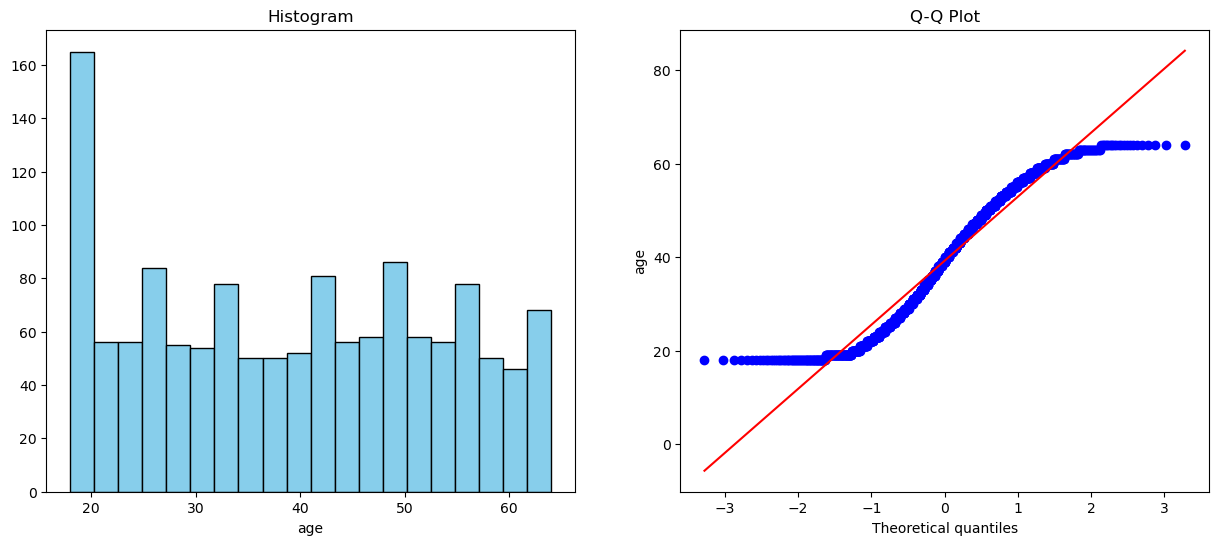

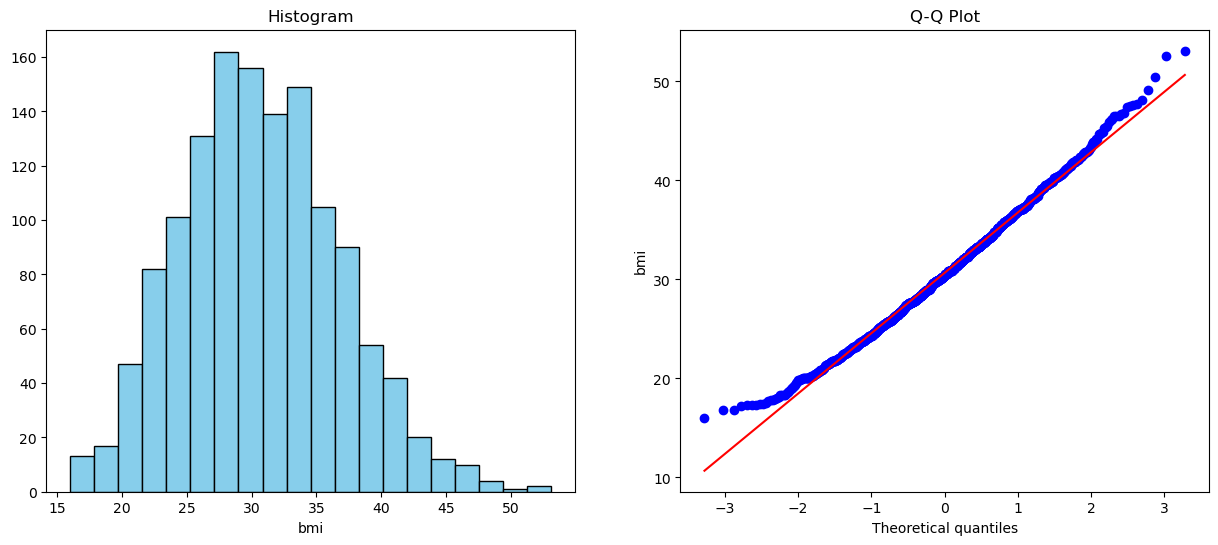

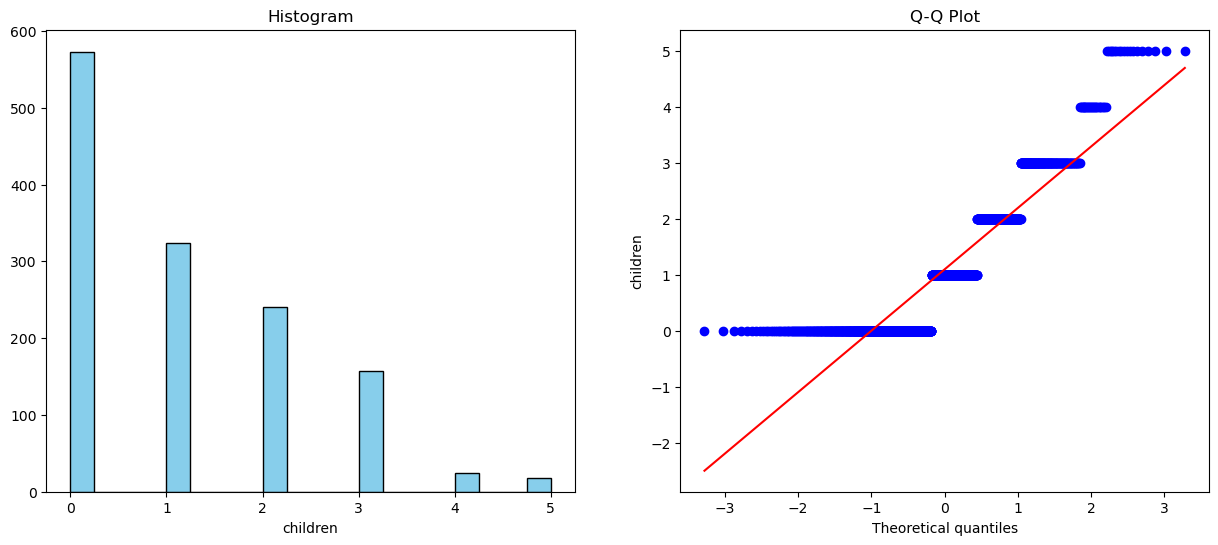

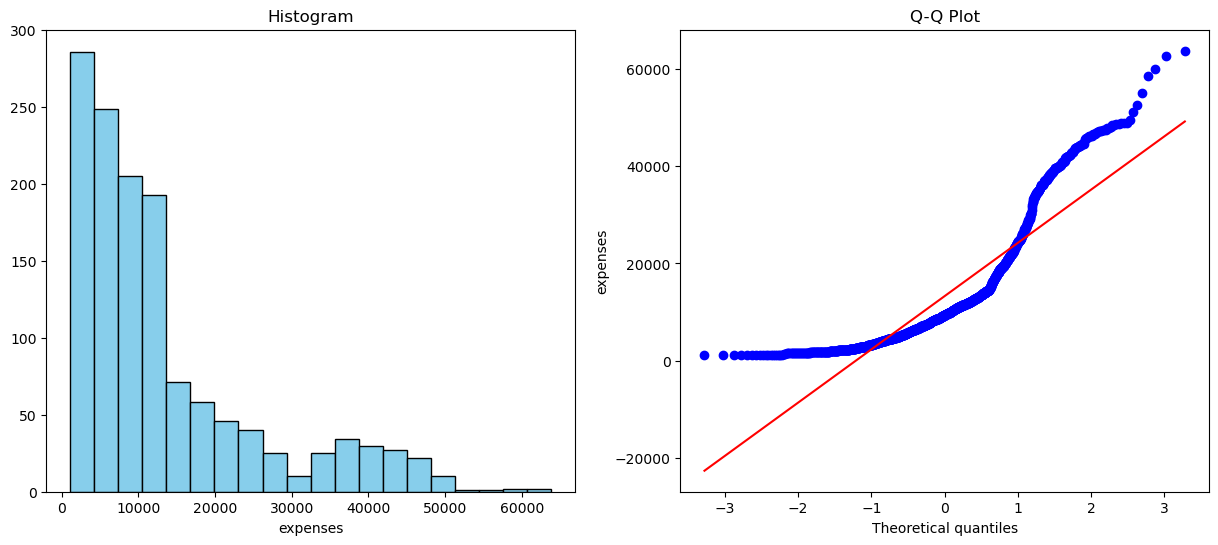

In [20]:
for col in numeric_columns:
    diagnostic_plots(df, col)

In [21]:
def age_group(X):
    if X in range(18,20):
        return '18-20'
    if X in range(20,30):
        return '20-30'
    if X in range(30,40):
        return '30-40'
    if X in range(40,50):
        return '40-50'
    elif X in range(50,60):
        return '50-60'
    else:
        return '60+'

In [22]:
df['age_group']=df['age'].apply(age_group)

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_age_distribution(data):
    """
    Plot the age distribution of current health insurers.

    Parameters:
        data (DataFrame): The input DataFrame containing age information.

    Returns:
        None: The function displays the age distribution plot.
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(20, 8))

    # Calculate the total count for percentage calculation
    total = float(len(data))

    # Create a countplot for age groups
    ax = sns.countplot(x="age_group", data=data)

    # Add title and adjust plot aesthetics
    plt.title('Age of Current Health Insurers', fontsize=20)
    plt.xlabel('Age Group')
    plt.ylabel('Count')

    # Annotate each bar with the percentage of occurrences
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

    # Display the plot
    plt.show()

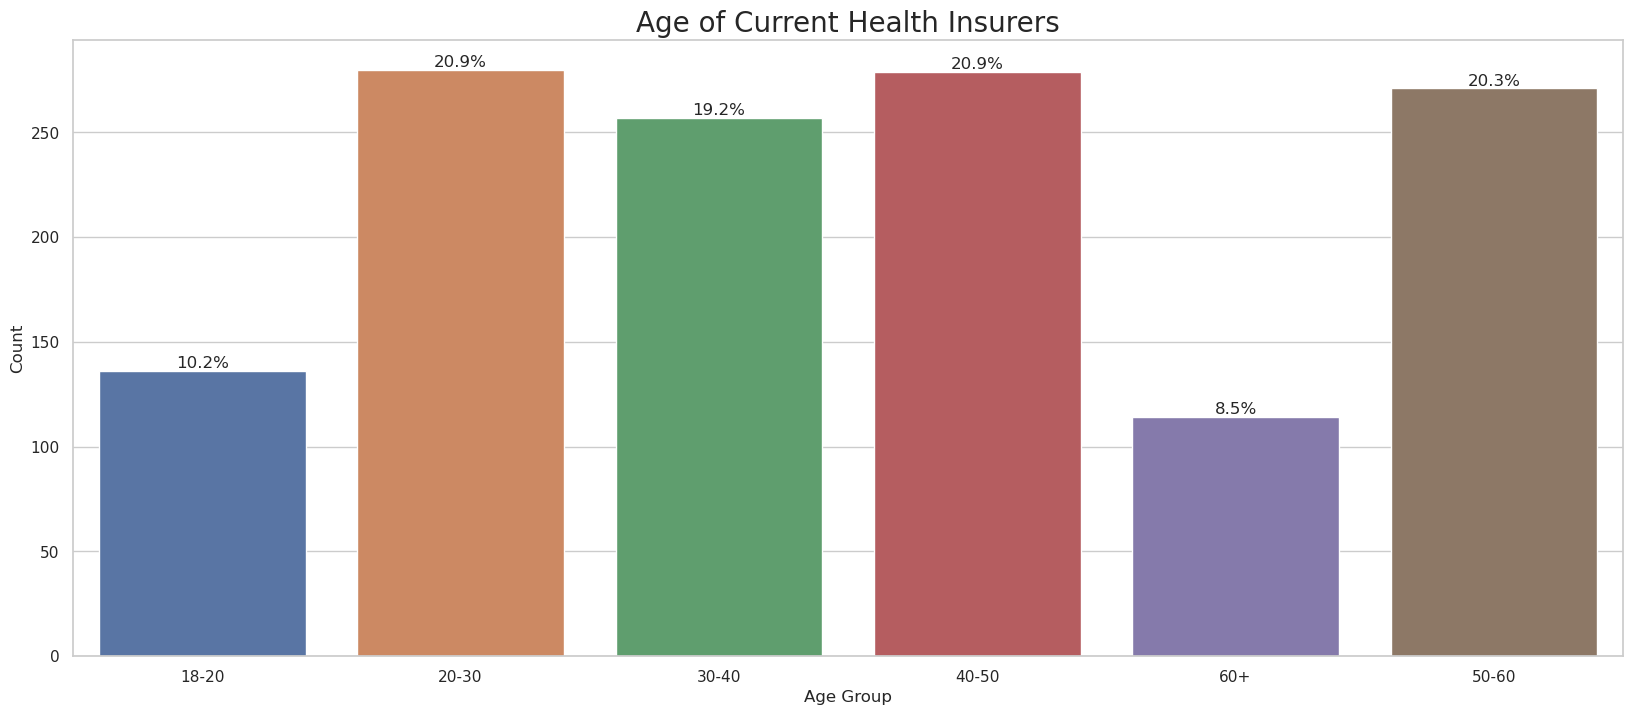

In [24]:
# Plot the age distribution
plot_age_distribution(df)

In [25]:
# Drop the 'age_group' column from the DataFrame
df.drop(["age_group"], axis=1, inplace=True)

In [26]:
fig = px.histogram(df, x='region', color="sex")
fig.update_layout(
        title='Histogram of Health Insurers by Region and Sex',
        xaxis_title='Region',
        yaxis_title='Count',
        bargap=0.2)
fig.show()

In [27]:
fig = px.histogram(df, x='sex')
fig.update_layout(
        title='Distribution of genders in the Dataset',
        xaxis_title='Sex',
        yaxis_title='Count',
        bargap=0.2
    )
fig.show()

In [28]:
fig = px.histogram(df, x='smoker', 
                       labels={'smoker': 'Smoker Status', 'count': 'Count'},
                       category_orders={'smoker': ['No', 'Yes']},
                       color_discrete_sequence=['skyblue'],
                       opacity=0.8,
                       template='plotly_white')

fig.update_layout(title='Distribution of Smokers',bargap=0.2)

# Display the plot
fig.show()

In [29]:
fig = px.histogram(df, x='children')
fig.update_layout(
        title='Distribution of of Number of Children in the Dataset',
        xaxis_title='Number of Children',
        yaxis_title='Count',
        bargap=0.2
    )
fig.show()

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_children_distribution(data):
    """
    Plot the distribution of the number of children for current health insurers.

    Parameters:
        data (DataFrame): The input DataFrame containing the number of children information.

    Returns:
        None: The function displays the children distribution plot.
    """
    sns.set(style="whitegrid")
    plt.figure(figsize=(20, 8))

    # Calculate the total count for percentage calculation
    total = float(len(data))

    # Create a countplot for the number of children
    ax = sns.countplot(x="children", data=data)

    # Add title and adjust plot aesthetics
    plt.title('Number of Children of Current Health Insurers', fontsize=20)
    plt.xlabel('Number of Children')
    plt.ylabel('Count')

    # Annotate each bar with the percentage of occurrences
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

    # Display the plot
    plt.show()

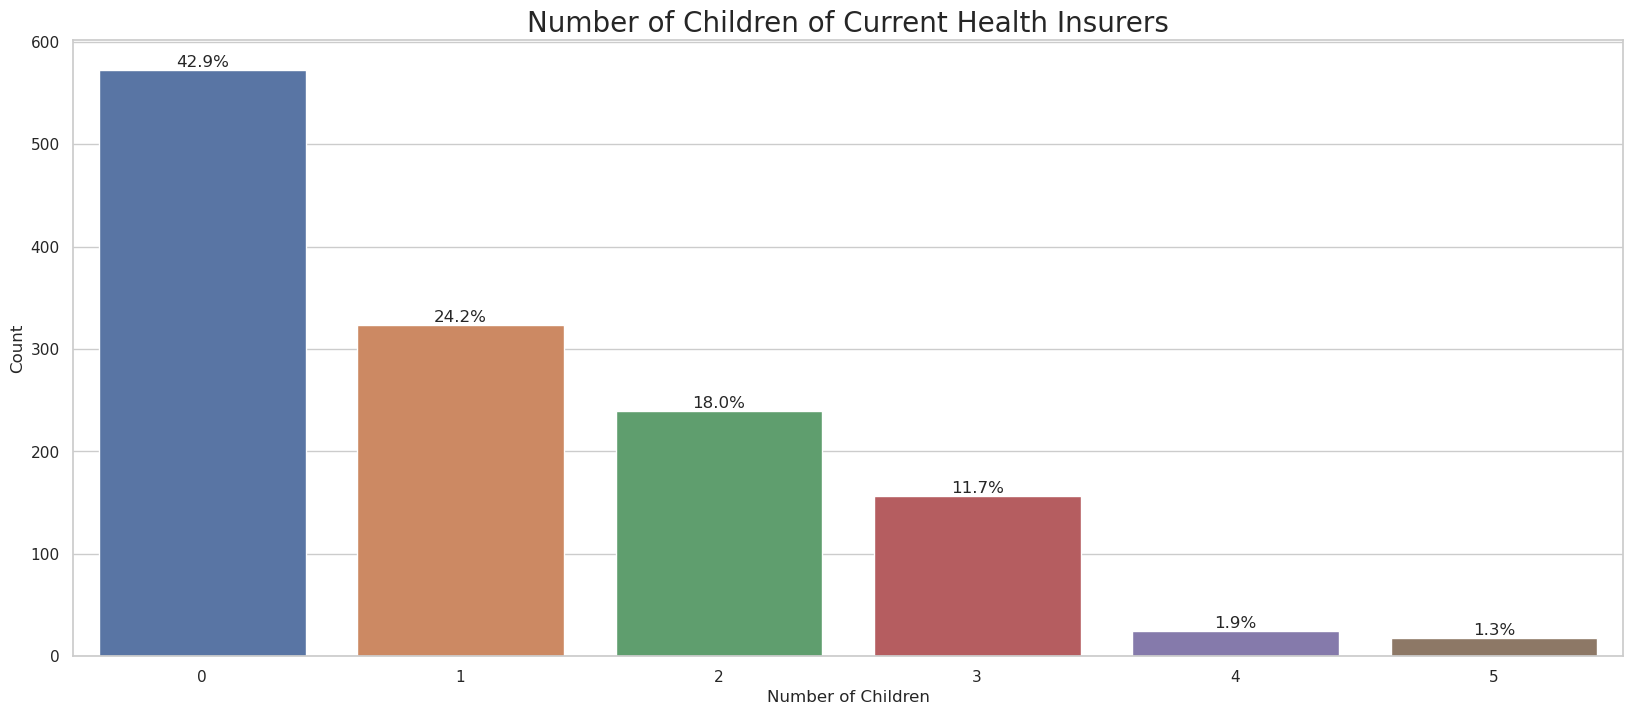

In [31]:
# Plot the distribution of the number of children
plot_children_distribution(df)

**Observations:**

* we can see that region feature is slightly imbalanced with southeast having few more records.
* gender feature is balanced. While smoker feature is highly imbalanced with most records having non-smokers.
* We can see that there are more individual without any offspring while there are 18 individuals with 5 childern.

In [32]:
# Create a scatter plot to visualize the relationship between age and expenses
scatter_fig = px.scatter(df, x="age", y="expenses", color="region", symbol="sex",
                         hover_data=['bmi', 'smoker', 'children'])

# Set the title of the plot
scatter_fig.update_layout(title_text='Relationship between Age and Expenses', title_font_size=20)

# Show the scatter plot
scatter_fig.show()

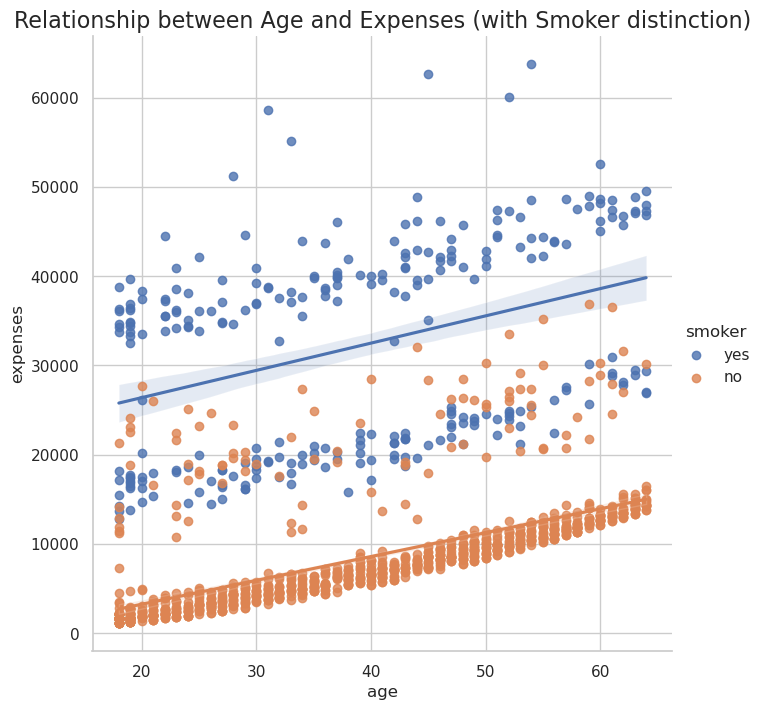

In [33]:
# Create a scatter plot with a linear regression model fit line
sns.lmplot(data=df, x='age', y='expenses', hue="smoker", height=7)

# Set the title for the plot
plt.title('Relationship between Age and Expenses (with Smoker distinction)', fontsize=16)

# Show the plot
plt.show()

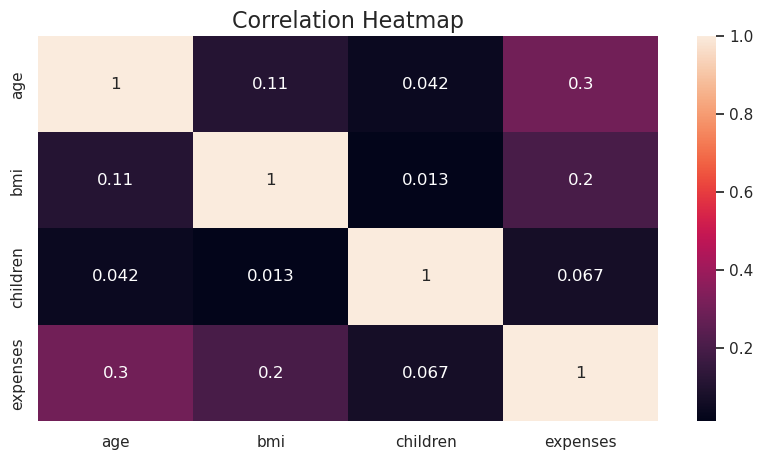

In [34]:
# Set the width and height of the figure
plt.figure(figsize=(10, 5))

# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap to visualize the correlation matrix with annotations
ax = sns.heatmap(corr, annot=True)

# Set the title for the plot
plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
plt.show()

# **Feature Engineering**

In [35]:
# One hot encoding on categorical columns
df = pd.get_dummies(df,columns = ['sex', 'smoker', 'region'],drop_first = True)

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X=df.drop(columns=['expenses'], axis=1)
y=df['expenses']

# **Model bulding**

## Model training

In [37]:
def evaluate_model(true, predicted, X_test):
    """
    Evaluate a model's performance using various metrics.

    Parameters:
        true (array-like): The true target values.
        predicted (array-like): The predicted target values.
        X_test (array-like): The feature matrix of the test set.

    Returns:
        tuple: A tuple containing Mean Squared Error, Mean Absolute Error,
               Root Mean Squared Error, R2 Score, and Adjusted R2 Score.
    """
    mse = mean_squared_error(true, predicted)  # Calculate Mean Squared Error
    mae = mean_absolute_error(true, predicted)  # Calculate Mean Absolute Error
    rmse = np.sqrt(mse)  # Calculate Root Mean Squared Error
    r2 = r2_score(true, predicted)  # Calculate R2 Score
    adj_r2 = 1 - (1 - r2) * (len(true) - 1) / (len(true) - X_test.shape[1] - 1)  # Calculate Adjusted R2 Score

    return mse, mae, rmse, r2, adj_r2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

def evaluate_models(X, y, models):
    """
    Evaluate the performance of different models on the dataset.

    Parameters:
        X (DataFrame): The feature matrix.
        y (Series): The target vector.
        models (dict): A dictionary containing model names as keys and model objects as values.

    Returns:
        tuple: Two DataFrames containing performance metrics for each model on the training and test sets.
    """
    train_metrics = []
    test_metrics = []

    # Separate dataset into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scaling the dataset
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    for model_name, model in models.items():
        model.fit(X_train, y_train)  # Train the model

        # Make predictions on training and test sets
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Evaluate model performance for training set
        train_metrics.append(evaluate_model_metrics(model_name, y_train, y_train_pred, X_train))

        # Evaluate model performance for test set
        test_metrics.append(evaluate_model_metrics(model_name, y_test, y_test_pred, X_test))

    # Create DataFrames for training and test set metrics
    train_report = pd.DataFrame(train_metrics, columns=['Model', 'Train Mean Squared Error',
                                                        'Train Mean Absolute Error',
                                                        'Train Root Mean Squared Error',
                                                        'Train R Squared', 'Train Adjusted R2 Score'])

    test_report = pd.DataFrame(test_metrics, columns=['Model', 'Test Mean Squared Error',
                                                      'Test Mean Absolute Error',
                                                      'Test Root Mean Squared Error',
                                                      'Test R Squared', 'Test Adjusted R2 Score'])

    return train_report, test_report


def evaluate_model_metrics(model_name, true, predicted, X):
    """
    Evaluate model metrics for a given set of true and predicted values.

    Parameters:
        model_name (str): The name of the model.
        true (array-like): The true target values.
        predicted (array-like): The predicted target values.
        X (array-like): The feature matrix.

    Returns:
        tuple: A tuple containing Model name, Mean Squared Error, Mean Absolute Error,
               Root Mean Squared Error, R2 Score, and Adjusted R2 Score.
    """
    mse = mean_squared_error(true, predicted)
    mae = mean_absolute_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_score_value = r2_score(true, predicted)
    adj_r2_score = 1 - (1 - r2_score_value) * (len(true) - 1) / (len(true) - X.shape[1] - 1)
    return model_name, mse, mae, rmse, r2_score_value, adj_r2_score

In [38]:
# Dictionary which contains models for the experiment
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=1),
    "Lasso Regression": Lasso(random_state=1),
    "Support Vector Regression": SVR(kernel='linear'),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=1),
    "Bagging Regressor": BaggingRegressor(random_state=1),
    "AdaBoost Regressor": AdaBoostRegressor(random_state=1),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=1),
    "XGB Regressor": XGBRegressor()
}

In [39]:
train_report_df, test_report_df = evaluate_models(X,y, models)

In [40]:
train_report_df

,Model,Train Mean Squared Error,Train Mean Absolute Error,Train Root Mean Squared Error,Train R Squared,Train Adjusted R2 Score
0,Linear Regression,3.697593e+07,4181.825636,6080.783489,0.729935,0.727896
1,Ridge Regression,3.697602e+07,4182.839731,6080.791117,0.729934,0.727896
2,Lasso Regression,3.697594e+07,4181.745957,6080.784798,0.729934,0.727896
3,Support Vector Regression,1.383175e+08,7570.663458,11760.844332,-0.010246,-0.017870
4,Decision Tree Regressor,0.000000e+00,0.000000,0.000000,1.000000,1.000000
5,Bagging Regressor,4.621008e+06,1091.474835,2149.652930,0.966249,0.965994
6,AdaBoost Regressor,2.570912e+07,4081.373927,5070.415773,0.812225,0.810808
7,Gradient Boosting Regressor,1.553547e+07,2159.432938,3941.506281,0.886532,0.885675
8,XGB Regressor,7.251511e+05,504.550203,851.558068,0.994704,0.994664


In [41]:
test_report_df

,Model,Test Mean Squared Error,Test Mean Absolute Error,Test Root Mean Squared Error,Test R Squared,Test Adjusted R2 Score
0,Linear Regression,3.548147e+07,4177.267596,5956.632572,0.806910,0.800946
1,Ridge Regression,3.551590e+07,4179.843668,5959.522021,0.806723,0.800753
2,Lasso Regression,3.548880e+07,4177.435834,5957.247633,0.806870,0.800905
3,Support Vector Regression,1.914900e+08,8689.314557,13837.991788,-0.042088,-0.074276
4,Decision Tree Regressor,3.815840e+07,2963.877127,6177.248887,0.792342,0.785928
5,Bagging Regressor,2.568503e+07,2815.656030,5068.040212,0.860222,0.855905
6,AdaBoost Regressor,2.641362e+07,4259.669496,5139.417824,0.856257,0.851817
7,Gradient Boosting Regressor,1.827638e+07,2523.249757,4275.088482,0.900540,0.897468
8,XGB Regressor,2.797412e+07,3102.639577,5289.056900,0.847765,0.843063


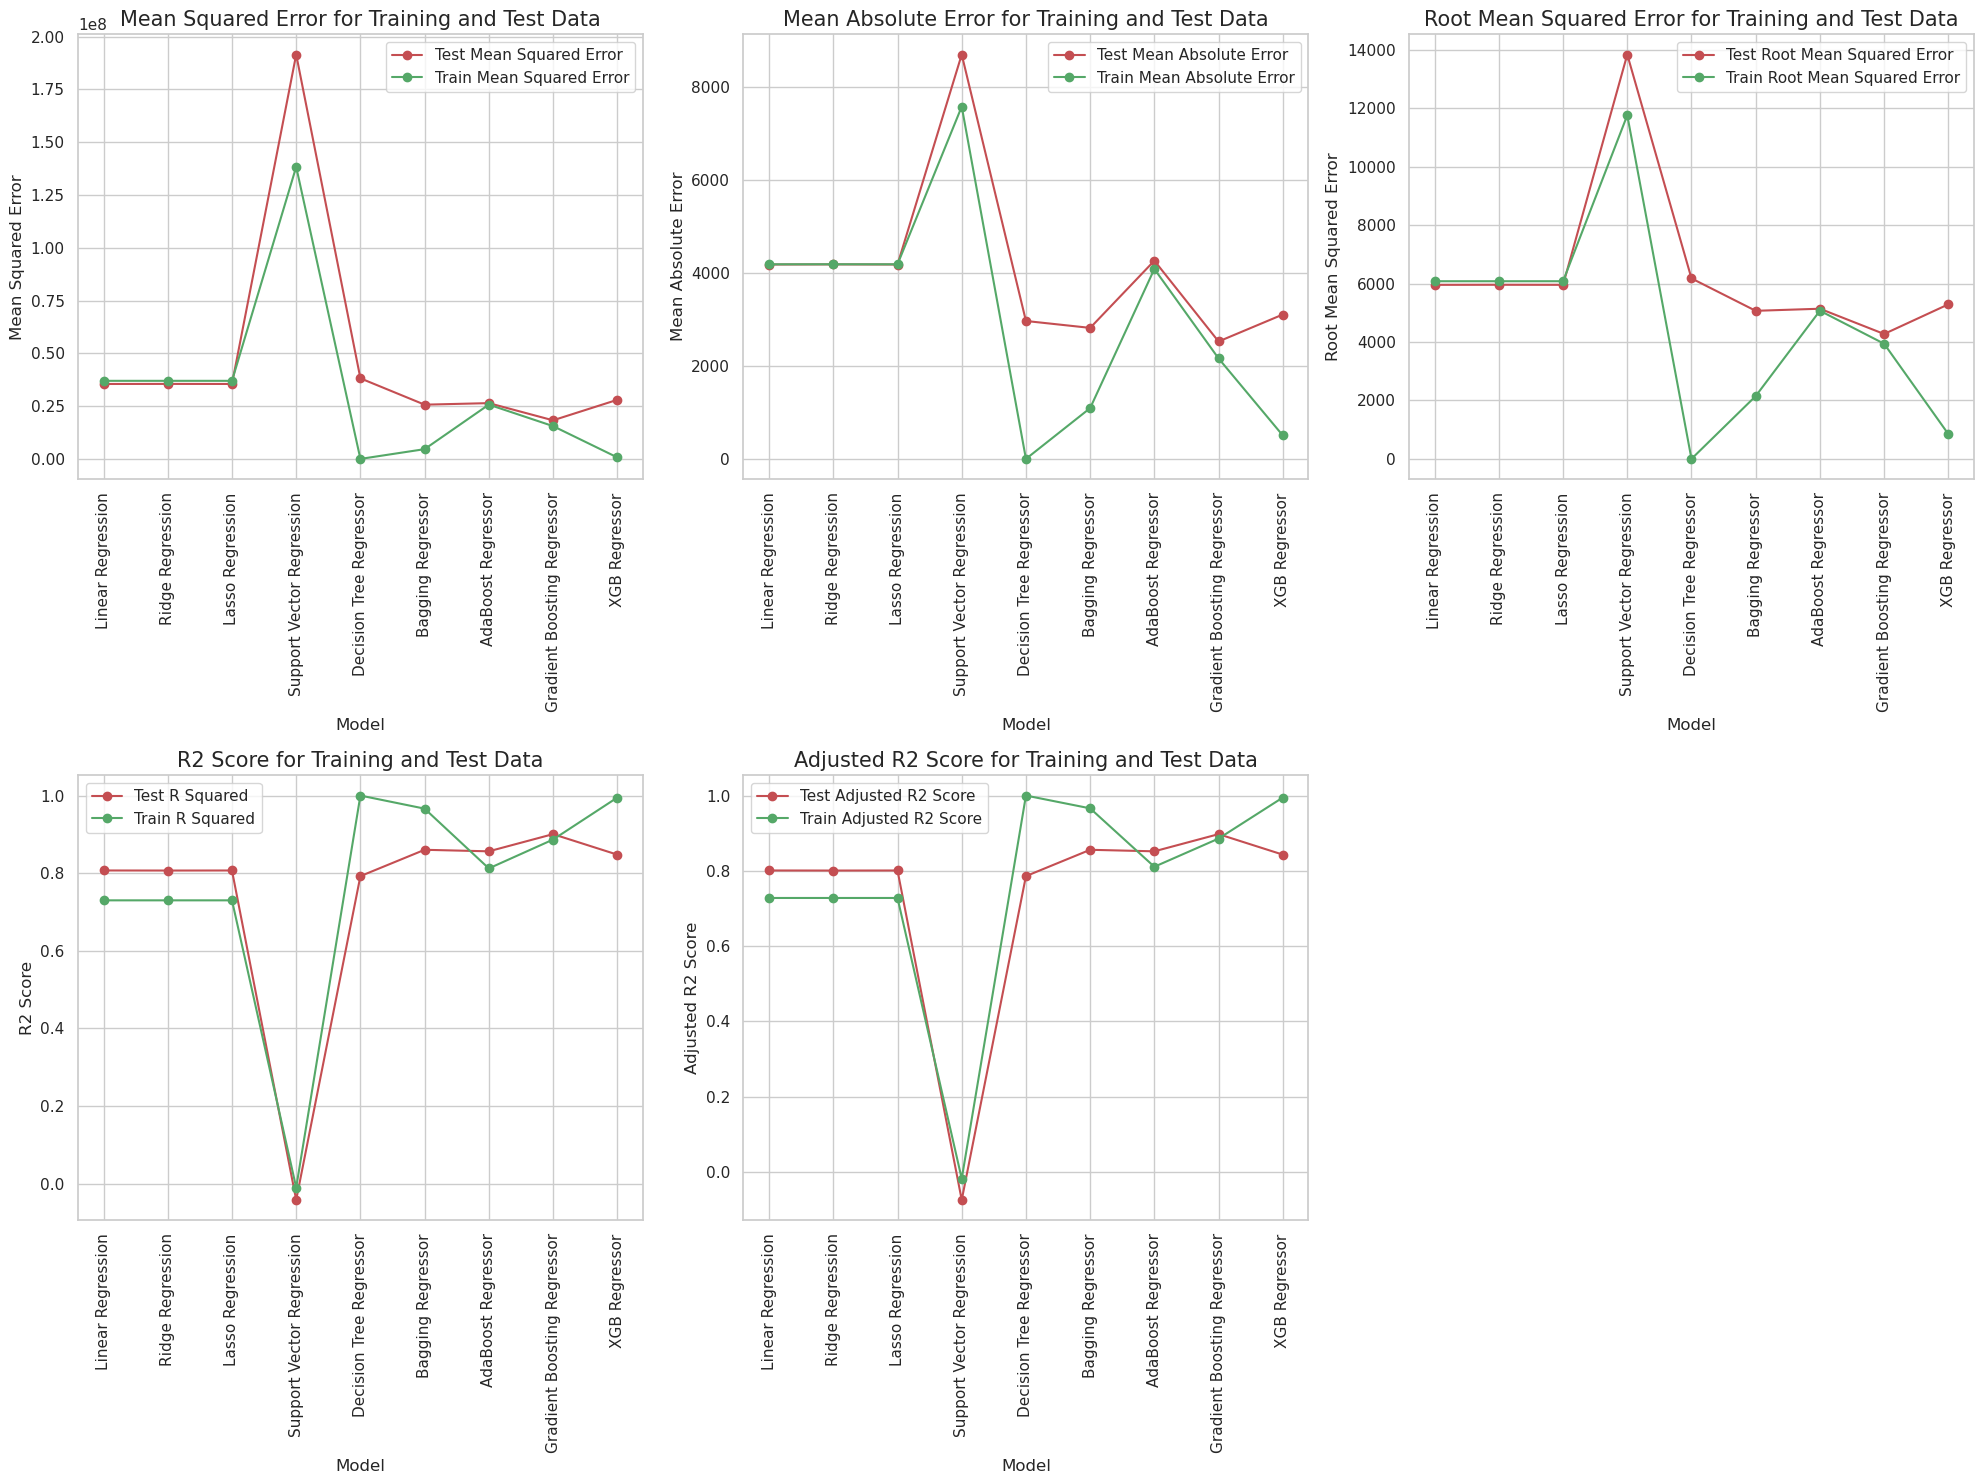

In [42]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 15))

# Plot Mean Squared Error comparison
plt.subplot(2, 3, 1)
plt.plot(test_report_df['Model'], test_report_df['Test Mean Squared Error'], marker='o', color='r', label='Test Mean Squared Error')
plt.plot(train_report_df['Model'], train_report_df['Train Mean Squared Error'], marker='o', color='g', label='Train Mean Squared Error')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Mean Squared Error", fontsize=12)
plt.title("Mean Squared Error for Training and Test Data", fontsize=15)
plt.xticks(rotation=90)  # Rotating the x labels
plt.legend()
plt.tight_layout()

# Plot Mean Absolute Error Comparison
plt.subplot(2, 3, 2)
plt.plot(test_report_df['Model'], test_report_df['Test Mean Absolute Error'], marker='o', color='r', label='Test Mean Absolute Error')
plt.plot(train_report_df['Model'], train_report_df['Train Mean Absolute Error'], marker='o', color='g', label='Train Mean Absolute Error')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Mean Absolute Error", fontsize=12)
plt.title("Mean Absolute Error for Training and Test Data", fontsize=15)
plt.xticks(rotation=90)  # Rotating the x labels
plt.legend()
plt.tight_layout()

# Plot Root Mean Squared Error Comparison
plt.subplot(2, 3, 3)
plt.plot(test_report_df['Model'], test_report_df['Test Root Mean Squared Error'], marker='o', color='r', label='Test Root Mean Squared Error')
plt.plot(train_report_df['Model'], train_report_df['Train Root Mean Squared Error'], marker='o', color='g', label='Train Root Mean Squared Error')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Root Mean Squared Error", fontsize=12)
plt.title("Root Mean Squared Error for Training and Test Data", fontsize=15)
plt.xticks(rotation=90)  # Rotating the x labels
plt.legend()
plt.tight_layout()

# Plot R2 Score Comparison
plt.subplot(2, 3, 4)
plt.plot(test_report_df['Model'], test_report_df['Test R Squared'], marker='o', color='r', label='Test R Squared')
plt.plot(train_report_df['Model'], train_report_df['Train R Squared'], marker='o', color='g', label='Train R Squared')
plt.xlabel("Model", fontsize=12)
plt.ylabel("R2 Score", fontsize=12)
plt.title("R2 Score for Training and Test Data", fontsize=15)
plt.xticks(rotation=90)  # Rotating the x labels
plt.legend()
plt.tight_layout()

# Plot Adjusted R2 Score Comparison
plt.subplot(2, 3, 5)
plt.plot(test_report_df['Model'], test_report_df['Test Adjusted R2 Score'], marker='o', color='r', label='Test Adjusted R2 Score')
plt.plot(train_report_df['Model'], train_report_df['Train Adjusted R2 Score'], marker='o', color='g', label='Train Adjusted R2 Score')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Adjusted R2 Score", fontsize=12)
plt.title("Adjusted R2 Score for Training and Test Data", fontsize=15)
plt.xticks(rotation=90)  # Rotating the x labels
plt.legend()
plt.tight_layout()

# Show the plots
plt.show()

## Hyperparameter tunning

In [43]:
# Create the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'n_estimators': [50, 100, 150, 200, 250, 300],
    'max_depth': [2, 3, 4, 5, 6, 7, 8]
}

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
# create the model
hpt_model = GradientBoostingRegressor()

In [45]:
from sklearn.model_selection import GridSearchCV

# create the grid search object
grid_search = GridSearchCV(hpt_model, param_grid, cv=10, n_jobs=-1, verbose=1)

In [46]:
# fit the grid search object to the training data
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 210 candidates, totalling 2100 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8],
                         'n_estimators': [50, 100, 150, 200, 250, 300]},
             verbose=1)

In [47]:
# print the best parameters
print(grid_search.best_params_)

{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 200}


## Final model building

In [48]:
# create the model with the best parameters
final_model = GradientBoostingRegressor(n_estimators=grid_search.best_params_['n_estimators'], 
                                        max_depth=grid_search.best_params_['max_depth'],
                                        learning_rate=grid_search.best_params_['learning_rate'])

In [49]:
# fit the model to the training data
final_model.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=200)

In [50]:
# evaluate the model on the test data
print(final_model.score(X_test, y_test))

0.8979260661468592


In [51]:
y_pred = grid_search.predict(X_test)

## Performance metrics

In [52]:
print('Mean Squared Error is: ', mean_squared_error(y_test,y_pred))
print('Mean Absolute Error is: ', mean_absolute_error(y_test,y_pred))
print('Root Mean Squared Error is: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Accuracy is: {} %'.format(round((r2_score(y_test, y_pred))*100,3)))
score = round((r2_score(y_test, y_pred))*100,3)
print('R2 Adjusted score is: {} %'.format(1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))

Mean Squared Error is:  18756704.781257134
Mean Absolute Error is:  2561.1819873430386
Root Mean Squared Error is:  4330.901151175946
Accuracy is: 89.793 %
R2 Adjusted score is: 92.53564092664094 %
